In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#loading the dataset and data preprocessing
#loading the csv as pandas df
gold_data = pd.read_csv('gld-price-data-csv.csv')

In [3]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
gold_data.shape

(2290, 6)

In [5]:
gold_data.info()
#checking datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [6]:
gold_data.isnull().sum()
#no missing data

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [7]:
gold_data.describe()
#statistical info about data

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [8]:
#CORRELATION BETWEEN COLUMNS(POSITIVE AND NEGATIVE)

In [9]:
correlation = gold_data.corr()

In [10]:
correlation

,SPX,GLD,USO,SLV,EUR/USD
SPX,1.000000,0.049345,-0.591573,-0.274055,-0.672017
GLD,0.049345,1.000000,-0.186360,0.866632,-0.024375
USO,-0.591573,-0.186360,1.000000,0.167547,0.829317
SLV,-0.274055,0.866632,0.167547,1.000000,0.321631
EUR/USD,-0.672017,-0.024375,0.829317,0.321631,1.000000


<AxesSubplot:>

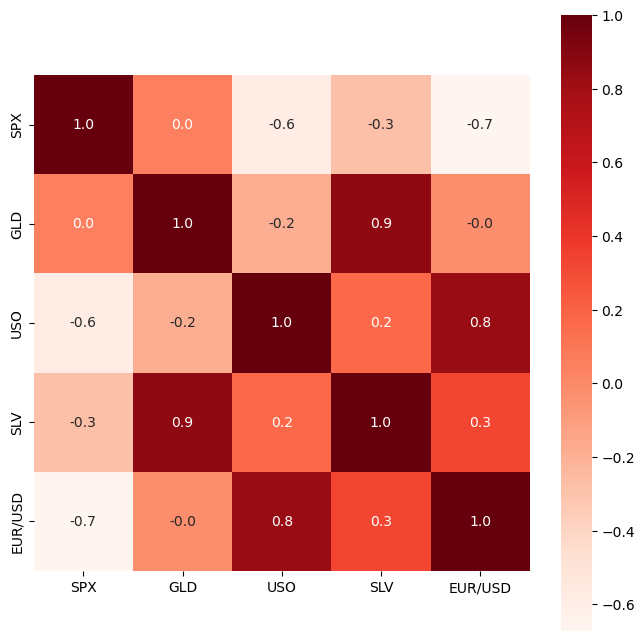

In [11]:
#generation of heatmap to understand the correlation visually
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':10}, cmap='Reds')

In [12]:
'''correlation: This variable represents the correlation matrix that you want to visualize.
cbar=True: It displays a color bar that indicates the values associated with the colors in the heatmap.
square=True: It makes the heatmap cells square-shaped.
fmt='.1f': It formats the numerical values in the cells to have one decimal place.
annot=True: It displays the actual correlation values in each cell.
annot_kws={'size':8}: It sets the size of the annotation text to 8 points.
cmap='Blues': It specifies the color map to be used for the heatmap, in this case, the "Blues" color map.'''

'correlation: This variable represents the correlation matrix that you want to visualize.\ncbar=True: It displays a color bar that indicates the values associated with the colors in the heatmap.\nsquare=True: It makes the heatmap cells square-shaped.\nfmt=\'.1f\': It formats the numerical values in the cells to have one decimal place.\nannot=True: It displays the actual correlation values in each cell.\nannot_kws={\'size\':8}: It sets the size of the annotation text to 8 points.\ncmap=\'Blues\': It specifies the color map to be used for the heatmap, in this case, the "Blues" color map.'

In [13]:
# correlation values of GOLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


/Users/cinthiyasingh/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GLD', ylabel='Density'>

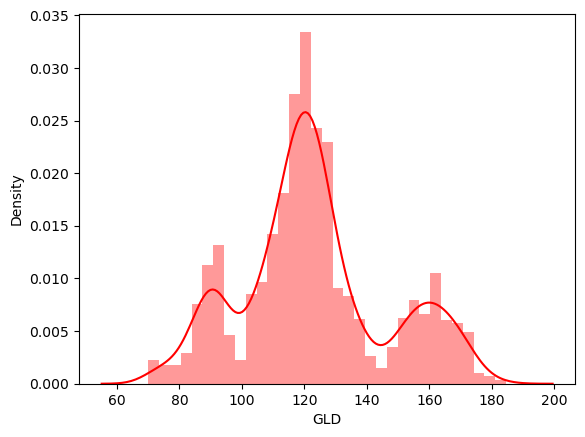

In [14]:
sns.distplot(gold_data['GLD'],color='red')

In [15]:
#SPLITTING OF FEATURES AND TARGET
X = gold_data.drop(['Date','GLD'],axis=1)
Y = gold_data['GLD']

In [16]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [17]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [18]:
#splitting into testing and training data
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

In [20]:
#RANDOM FOREST REGRESSOR MODEL TRAINING
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [21]:
reg = RandomForestRegressor(n_estimators=100)
#n_estimators specifies number of decision tress used

In [22]:
#TRAIN!TRAIN!TRAIN!!!!
rf=reg.fit(X_train,Y_train)

In [23]:
#evaluation
test_data_pred = reg.predict(X_test)

In [24]:
print(test_data_pred)

[168.65149904  81.95599991 115.63679984 127.76870076 120.63820126
 154.76789776 150.1682983  126.08500055 117.3597987  125.88820111
 116.44790136 171.65090084 142.00569844 168.21849843 115.05030003
 117.7180007  137.93360323 170.25730121 159.67860321 157.78129842
 154.97240011 124.966      175.80090007 157.51670354 125.18020025
  94.01579977  77.18410018 120.44829988 119.16549983 167.30840025
  88.33240036 125.05099997  91.09590109 117.66150008 121.14359895
 136.57040108 115.66720079 115.53880054 147.50039981 106.92350099
 103.93980226  87.13209804 126.54640072 118.09469974 153.32519961
 119.50240011 108.28880003 107.90939834  93.1827005  127.19229775
  74.95440027 113.59059911 121.32430012 111.17509896 119.0124992
 120.6405998  159.80370111 167.34660092 146.7462968   85.85069894
  94.52550045  86.63949922  90.62410007 118.78490072 126.46230064
 127.58740009 169.08740068 122.31659905 117.26919909  98.52450011
 167.51090079 143.18709844 132.34930265 121.10160241 121.43119966
 119.768000

In [25]:
# R squared error calculation
error_score = metrics.r2_score(Y_test, test_data_pred)
print("R squared error : ", error_score)

R squared error :  0.9890679802812352


In [26]:
#Comparision of actual and predicted
Y_test = list(Y_test)

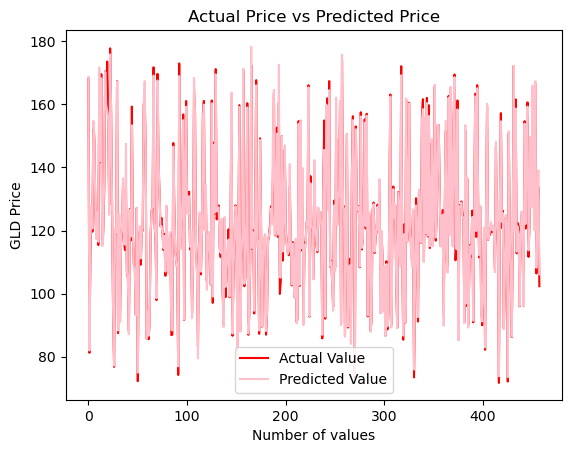

In [27]:
plt.plot(Y_test, color='red', label = 'Actual Value')
plt.plot(test_data_pred, color='pink', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

In [28]:
new_data = pd.DataFrame({
    'SPX':1654.315776,
    'USO':31.842221,
    'SLV':20.084997,
    'EUR/USD':1.283653,   
},index=[0])
new_data
p = rf.predict(new_data)
if p[0]>=122.732875:
    print("COST IS HIGH")
else:
    print("COST IS LOW")

COST IS HIGH


In [29]:
import joblib
joblib.dump(rf,'model_joblib_gold.pkl')
model = joblib.load('model_joblib_gold.pkl')
model.predict(new_data)


array([130.45590082])

In [30]:
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [ ]:
from tkinter import *
import joblib
import numpy as np
from sklearn import *
def show_entry_fields():
    p1=float(e1.get())
    p2=float(e2.get())
    p3=float(e3.get())
    p4=float(e4.get())
    model = joblib.load('model_joblib_gold')
    result=model.predict([[p1,p2,p3,p4]])
    
    if result >= 122.732875:
        Label(master, text=result).grid(row=31)
    else:
        Label(master, text=result).grid(row=31)
    
    
master = Tk()
master.title("Gold Price Prediction System")


label = Label(master, text = "Gold Price Prediction System"
                          , bg = "black", fg = "white"). \
                               grid(row=0,columnspan=2)


Label(master, text="Enter SPX").grid(row=1)
Label(master, text="Enter USO").grid(row=2)
Label(master, text="Enter SLV").grid(row=3)
Label(master, text="Enter EUR/USD").grid(row=4)




e1 = Entry(master)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)

e1.grid(row=1, column=1)
e2.grid(row=2, column=1)
e3.grid(row=3, column=1)
e4.grid(row=4, column=1)



Button(master, text='Predict', command=show_entry_fields).grid()

mainloop()

/Users/cinthiyasingh/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
